# **LunarLaunch - Advantage Actor-Critic**

The implementation of Advantage Actor-Critic for LunarLunch v3.



## Initialization

In [1]:
%matplotlib inline
from IPython import display
import matplotlib.pyplot as plt

In [2]:
from sim.GymTrainer import GymTrainer
from framework.A2C import AdvantageActorCriticAgent

import torch
trainDevice = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [7]:
# Create the simulation environment
sim = GymTrainer(
    'LunarLander-v3', 
    evalDevice="cpu", 
    trainDevice=trainDevice, 
    render_mode='rgb_array', 
    envNum=4,
    maxEpisode=5000,
    batchSize=6,
    maxStep=5000,
    stepLimitPenalty=0,
    seed=543)

=============Initializing=============
Initializing Gym Environments of LunarLander-v3
init envs
set seeds 543


In [4]:
# Create the agent
agent = AdvantageActorCriticAgent(
    actionNum=sim.actionSize(), 
    stateNum=8, 
    gamma=0.99, 
    policyLR=0.003, 
    criticLR=0.01)

## Training

In [5]:
name, writer = sim.makeSummaryWriter(agent)
for stage in sim.train(agent, writer):
    pass

=============Start Training=============
Batch:1 	 Episode:6 	 Loss: -0.09 	 AvgAdv: -7.71 	 AvgRew: -150.33 	 FinRew: -100.00 	 LossCritic: 1.01
Batch:2 	 Episode:12 	 Loss: -0.05 	 AvgAdv: -3.39 	 AvgRew: -119.02 	 FinRew: -100.00 	 LossCritic: 1.01
Batch:3 	 Episode:18 	 Loss: -0.00 	 AvgAdv: -0.43 	 AvgRew: -181.07 	 FinRew: -100.00 	 LossCritic: 1.01
Batch:4 	 Episode:24 	 Loss: 0.00 	 AvgAdv: 0.30 	 AvgRew: -200.64 	 FinRew: -100.00 	 LossCritic: 1.04
Batch:5 	 Episode:31 	 Loss: 0.04 	 AvgAdv: 3.08 	 AvgRew: -191.05 	 FinRew: -100.00 	 LossCritic: 1.02
Batch:6 	 Episode:37 	 Loss: 0.05 	 AvgAdv: 4.10 	 AvgRew: -230.76 	 FinRew: -100.00 	 LossCritic: 1.00
Batch:7 	 Episode:43 	 Loss: 0.05 	 AvgAdv: 3.97 	 AvgRew: -232.50 	 FinRew: -100.00 	 LossCritic: 1.00
Batch:8 	 Episode:49 	 Loss: 0.05 	 AvgAdv: 4.07 	 AvgRew: -182.70 	 FinRew: -100.00 	 LossCritic: 0.99
Batch:9 	 Episode:55 	 Loss: 0.05 	 AvgAdv: 4.45 	 AvgRew: -180.34 	 FinRew: -100.00 	 LossCritic: 1.00
Batch:10 	 Episode

KeyboardInterrupt: 

# Testing

KeyboardInterrupt: 

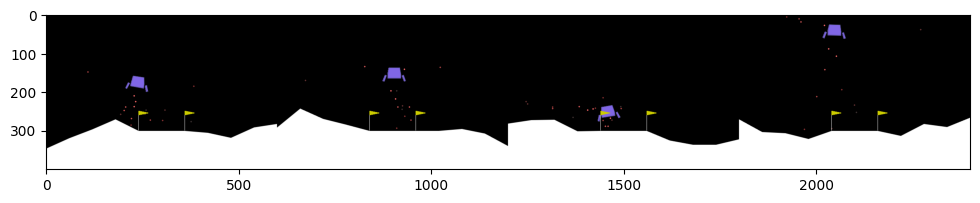

In [8]:
sim.test(
    agent = agent, 
    episode = 12, 
    maxStep = 1000, 
    renderStep = 3,
    writer = writer)

## Save

In [ ]:
agent.save(name)

# Run saved weight

In [ ]:
agent.load_state_dict(torch.load('A3C-best.pt'))
sim.test(
    agent = agent, 
    episode = 12, 
    maxStep = 1000, 
    renderStep = 3,
    writer = writer)